In [15]:
! pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.8 MB/s eta 0:00:00


a name to id dic, key is species name and value is two IDs \
deliever a key to multifunction \
save X_key, y_key as pickle

In [1]:
name_to_id = {}
name_to_id['E.coli.K-12'] = ['511145', 'iML1515']
name_to_id['Shigella.boydii'] = ['344609', 'iSbBS512_1146']
name_to_id['Shigella.flexneri'] = ['198214', 'iSF_1195']
name_to_id['E.coli.O157:H7.EDl933'] = ['155864', 'iZ_1308']
name_to_id['Shigella.dysenteriae'] = ['300267', 'iSDY_1059']
name_to_id['Salmonella.enterica'] = ['99287', 'STM_v1_0']
name_to_id['Klebsiella'] = ['272620', 'iYL1228']
name_to_id['Yersinia'] = ['214092', 'iPC815']

In [2]:
list(name_to_id.keys())

['E.coli.K-12',
 'Shigella.boydii',
 'Shigella.flexneri',
 'E.coli.O157:H7.EDl933',
 'Shigella.dysenteriae',
 'Salmonella.enterica',
 'Klebsiella',
 'Yersinia']

In [3]:
import networkx as nx
from tqdm import tqdm
#import cobra
from Bio import SeqIO
import numpy as np
from itertools import product
import csv
import pickle

In [16]:
def process_data (x):
    
    '''

    # PPI data ================================================================
    G = nx.Graph()

    path = '/home/user/Desktop/pine/cross_pathogen/PPI_data/'
    ppi_file = name_to_id[x][0] + '.protein.links.v12.0.txt'
    
    # Precompile the part of the identifier to be removed for efficiency.
    l_prefix = len(name_to_id[x][0]) + 1
    
    with open( path + ppi_file, 'r') as file:
        next(file)  # Skip the header line
        for line in tqdm(file):
            parts = line.strip().split()
            if len(parts) < 3 :
                continue
            protein1, protein2, score = parts
            protein1 = protein1[l_prefix:]  # Remove prefix more efficiently
            protein2 = protein2[l_prefix:]  # Remove prefix more efficiently
            G.add_edge(protein1, protein2, weight=score)         
    print(G)

    
    # calculate degree for each node
    degree_dict = dict(G.degree())

    
    # calculate clustering coefficient 
    clustering_dict = nx.clustering(G)
    
    # calculate betweenness centrality for each node
    betweenness_dict = nx.betweenness_centrality(G)
    
    # calculate eigenvector centrality for each node
    eigenvector_dict = nx.eigenvector_centrality(G)
    
    # calculate closeness centrality for each node
    closeness_dict = nx.closeness_centrality(G)
    
    # calculate pagerank for each node
    pagerank_dic = nx.pagerank(G)
    
    # calculate load centrality
    load_dict = nx.load_centrality(G)
    
    # calculate harmonic centrality
    harmonic_dict = nx.harmonic_centrality(G)

    # DNA 3-mer ===============================================================
    
    # define all possible 3-mers
    nucleotides = ['A', 'T', 'G', 'C']
    all_3_mers = [a+b+c for a in nucleotides for b in nucleotides for c in nucleotides]
    
    seq = {}
    path = '/home/user/Desktop/pine/cross_pathogen/fasta/'
    with open(path + name_to_id[x][1] + '_dna.fasta', 'r') as f:
        for r in SeqIO.parse(f, 'fasta'):
            seq[r.id] = str(r.seq)
    print(len(seq))

    three_mer_feature_dic = {}
    
    for gene, sequ in seq.items():
        feature_vector = {three_mer: 0 for three_mer in all_3_mers}  
        for i in range(len(sequ) - 2):
            mer = sequ[i:i+3]
            if mer in feature_vector:
                feature_vector[mer] += 1   
        three_mer_feature_dic[gene] = [feature_vector[mer] for mer in all_3_mers]

    '''
    # protein =============================================================
    path = '/data1/xpgeng/cross_pathogen/get_sequence/'
    
    # calculate features 2-mer
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    all_2_mers = [a+b for a in amino_acids for b in amino_acids]

    pepdic = {}
    for r in SeqIO.parse(path + name_to_id[x][1] + '_protein.fasta', 'fasta'):     
        pepdic[r.id] = str(r.seq)
    print(len(pepdic))

    two_mer_feature_dic = {}
    for gene, sequ in pepdic.items():
        feature_vector = {two_mer: 0 for two_mer in all_2_mers}  
        for i in range(len(sequ) - 1):
            mer = sequ[i:i+2]
            if mer in feature_vector:
                feature_vector[mer] += 1   
        two_mer_feature_dic[gene] = [feature_vector[mer] for mer in all_2_mers]

    # Read knockout =============================================================
    
    path = '/data1/xpgeng/cross_pathogen/one_two_knockout/'
    
    one_gene = {}
    with open(path + name_to_id[x][1] +'_1KO_growth', 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader) 
        for row in reader:
            #print(len(row))
            if len(row) == 4:            
                one_gene[row[0]] = int(row[3])           
        print(len(one_gene)) 
    
    def count_value_in_dict(dictionary, value_to_count):
        count = 0
        for value in dictionary.values():
            if value == value_to_count:
                count += 1
        return count
    
    print(count_value_in_dict(one_gene, 1))  

    # common Features

    common_keys = (
        #set(degree_dict.keys()) & 
        #set(clustering_dict.keys()) &
        #set(betweenness_dict.keys()) &
        #set(eigenvector_dict.keys()) &
        #set(closeness_dict.keys()) &
        #set(pagerank_dic.keys()) &
        #set(load_dict.keys()) &
        #set(harmonic_dict.keys()) &
        #set(three_mer_feature_dic.keys()) & 
        set(two_mer_feature_dic.keys()) &
        set(one_gene.keys())
    )
    print(len(common_keys))

    # features processing

    feature_list = []
    label_list = []
    
    for key in tqdm(common_keys):
        concatenated_features = (
            #[degree_dict[key]] + 
            #[clustering_dict[key]] +
            #[betweenness_dict[key]] +
            #[eigenvector_dict[key]] +
            #[closeness_dict[key]] +
            #[pagerank_dic[key]] +
            #[load_dict[key]] +  
            #[harmonic_dict[key]] +
            #three_mer_feature_dic[key] +
            two_mer_feature_dic[key]
        )
        
        feature_list.append(concatenated_features)
        
        label_list.append(one_gene[key])
        
    X_train = np.array(feature_list)
    y_train = np.array(label_list)

  
    with open(f"{x}_1ko_X.pkl" , 'wb') as file:
        pickle.dump(X_train, file)

    with open(f"{x}_1ko_y.pkl" , 'wb') as file:
        pickle.dump(y_train, file)
    print('saved')

    return

In [17]:
for i in list(name_to_id.keys()):
    process_data(i)

1513
1516
196
1513


100%|████████████████████████| 1513/1513 [00:00<00:00, 1008739.78it/s]

saved
1099


1147
212
1099


100%|████████████████████████| 1099/1099 [00:00<00:00, 1323819.67it/s]

saved
1158


1195
206
1158


100%|████████████████████████| 1158/1158 [00:00<00:00, 1091952.35it/s]

saved
1295


1308
210
1295


100%|████████████████████████| 1295/1295 [00:00<00:00, 1097741.24it/s]

saved
1017


1059
204
1017


100%|█████████████████████████| 1017/1017 [00:00<00:00, 774438.48it/s]

saved
1251


1270
202
1250


100%|████████████████████████| 1250/1250 [00:00<00:00, 1039841.33it/s]

saved
1228


1229
119
1228


100%|█████████████████████████| 1228/1228 [00:00<00:00, 952757.18it/s]

saved
814


814
145
814


100%|██████████████████████████| 814/814 [00:00<00:00, 1623472.87it/s]


saved


### 1. one-gene Cross-species prediction

In [4]:
species = list(name_to_id.keys())

In [5]:
species

['E.coli.K-12',
 'Shigella.boydii',
 'Shigella.flexneri',
 'E.coli.O157:H7.EDl933',
 'Shigella.dysenteriae',
 'Salmonella.enterica',
 'Klebsiella',
 'Yersinia']

In [7]:
import torch
print(torch.cuda.is_available())

True


In [8]:
# 设置 GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
in_features = 400

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_auc_score
import seaborn as sns
import time
import pickle
import csv

In [11]:
# 定义 PyTorch 模型
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.ReLU(),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )
    
    def forward(self, x):
        return self.layers(x)

def run_pytorch_MLP(X_train, X_test, y_train, y_test, 
                    batch_size, learning_rate, weight_decay, num_train_epochs):
    # 使用 SMOTE
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # 将 numpy 数据转换为 torch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train, dtype=torch.long).to(device)
    X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test, dtype=torch.long).to(device)

    # 创建 DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # 初始化模型
    model = MLP()
    model.to(device)  # 移动模型到 GPU
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    
    train_losses = []
    validation_losses = []

    for epoch in range(num_train_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_losses.append(running_loss / len(train_loader))
        
        model.eval()
        with torch.no_grad():
            outputs = model(X_test.to(device))
            validation_loss = criterion(outputs, y_test.to(device))
            validation_losses.append(validation_loss.item())
        
        print(f'Epoch {epoch+1} - Train Loss: {running_loss / len(train_loader):.3f}, Validation Loss: {validation_loss.item():.3f}')

    return model, train_losses, validation_losses

In [42]:
auc_dic = {}

for train in species:
    with open(train + "_1ko_X.pkl" , 'rb') as f:
        X_train = pickle.load(f)
    with open(train + "_1ko_y.pkl" , 'rb') as f:
        y_train = pickle.load(f)
        
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)    
    
    # 运行模型
    num_train_epochs = 25
    model, train_losses, validation_losses = run_pytorch_MLP(
        X_train, X_val, y_train, y_val, batch_size=50, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)
    
    for test in species:
        with open(test + "_1ko_X.pkl" , 'rb') as f:
            X_test = pickle.load(f)
        
        with open(test + "_1ko_y.pkl" , 'rb') as f:
            y_test = pickle.load(f)
            
        X_test = scaler.transform(X_test) # scaler each test
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

        model.eval()  # 设置模型为评估模式
        
        with torch.no_grad():
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs, 1)
            predicted = predicted.cpu().numpy()
            y_test_np = y_test  # 直接使用 y_test，因为它已经是 numpy 数组
       
        
        # 计算混淆矩阵
        conf_matrix = confusion_matrix(y_test_np, predicted)
        print("Confusion Matrix:")
        print(conf_matrix)

        # 计算 Precision, Recall 和 F1-Score
        precision, recall, f1, _ = precision_recall_fscore_support(y_test_np, predicted, average='binary')
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")

        # 计算 AUC
        probabilities = torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy()
        auc_score = roc_auc_score(y_test_np, probabilities)
        print(f"AUC Score: {auc_score:.4f}")  
        
        auc_dic[train, test] = auc_score
        
        
        '''
        # Predict probabilities for the test data
        #s = time.time()
        probs = model.predict_proba(X_test)
        #e = time.time()
        #print('time is: ', round(e-s,3), 'second')
        
        # Change the threshold
        threshold = 0.5
        y_pred = np.where(probs[:,1] > threshold, 1, 0)
        
        # Calculate the ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        roc_auc = auc(fpr, tpr)
        
        # Calculate confusion matrix
        #y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        # Calculate precision, recall, and F1 score
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        print(cm)
        print(f'AUC: {roc_auc:.2f}')
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')  

        auc_dic[train, test] = roc_auc
        precision_dic[train, test] = precision
        recall_dic[train, test] = recall
        f1score_dic[train, test] = f1
        time_dic[train, test] = round(e-s,3)
        '''

Epoch 1 - Train Loss: 0.661, Validation Loss: 0.650
Epoch 2 - Train Loss: 0.588, Validation Loss: 0.594
Epoch 3 - Train Loss: 0.508, Validation Loss: 0.514
Epoch 4 - Train Loss: 0.422, Validation Loss: 0.501
Epoch 5 - Train Loss: 0.341, Validation Loss: 0.429
Epoch 6 - Train Loss: 0.271, Validation Loss: 0.396
Epoch 7 - Train Loss: 0.215, Validation Loss: 0.373
Epoch 8 - Train Loss: 0.167, Validation Loss: 0.375
Epoch 9 - Train Loss: 0.130, Validation Loss: 0.378
Epoch 10 - Train Loss: 0.101, Validation Loss: 0.371
Epoch 11 - Train Loss: 0.079, Validation Loss: 0.385
Epoch 12 - Train Loss: 0.061, Validation Loss: 0.384
Epoch 13 - Train Loss: 0.049, Validation Loss: 0.393
Epoch 14 - Train Loss: 0.039, Validation Loss: 0.399
Epoch 15 - Train Loss: 0.030, Validation Loss: 0.415
Epoch 16 - Train Loss: 0.025, Validation Loss: 0.421
Epoch 17 - Train Loss: 0.021, Validation Loss: 0.430
Epoch 18 - Train Loss: 0.017, Validation Loss: 0.440
Epoch 19 - Train Loss: 0.014, Validation Loss: 0.448
Ep

Confusion Matrix:
[[572  97]
 [ 78  67]]
Precision: 0.4085
Recall: 0.4621
F1-Score: 0.4337
AUC Score: 0.7543
Epoch 1 - Train Loss: 0.673, Validation Loss: 0.700
Epoch 2 - Train Loss: 0.628, Validation Loss: 0.677
Epoch 3 - Train Loss: 0.589, Validation Loss: 0.648
Epoch 4 - Train Loss: 0.545, Validation Loss: 0.619
Epoch 5 - Train Loss: 0.501, Validation Loss: 0.590
Epoch 6 - Train Loss: 0.454, Validation Loss: 0.569
Epoch 7 - Train Loss: 0.406, Validation Loss: 0.542
Epoch 8 - Train Loss: 0.364, Validation Loss: 0.550
Epoch 9 - Train Loss: 0.319, Validation Loss: 0.538
Epoch 10 - Train Loss: 0.278, Validation Loss: 0.516
Epoch 11 - Train Loss: 0.242, Validation Loss: 0.518
Epoch 12 - Train Loss: 0.208, Validation Loss: 0.528
Epoch 13 - Train Loss: 0.177, Validation Loss: 0.539
Epoch 14 - Train Loss: 0.151, Validation Loss: 0.534
Epoch 15 - Train Loss: 0.128, Validation Loss: 0.557
Epoch 16 - Train Loss: 0.109, Validation Loss: 0.552
Epoch 17 - Train Loss: 0.091, Validation Loss: 0.568

AUC Score: 0.7361
Confusion Matrix:
[[952  99]
 [107  92]]
Precision: 0.4817
Recall: 0.4623
F1-Score: 0.4718
AUC Score: 0.7731
Confusion Matrix:
[[986 124]
 [ 56  62]]
Precision: 0.3333
Recall: 0.5254
F1-Score: 0.4079
AUC Score: 0.7841
Confusion Matrix:
[[661   8]
 [  8 137]]
Precision: 0.9448
Recall: 0.9448
F1-Score: 0.9448
AUC Score: 0.9821


In [40]:
# plot result
import matplotlib.pyplot as plt
import seaborn as sns
matrix = np.zeros((8,8))
index_map = {}

a = 0
for i in species:
    index_map[i] = a
    a+=1

for (row, col),v in auc_dic.items():
    matrix[index_map[row], index_map[col]] = v
    

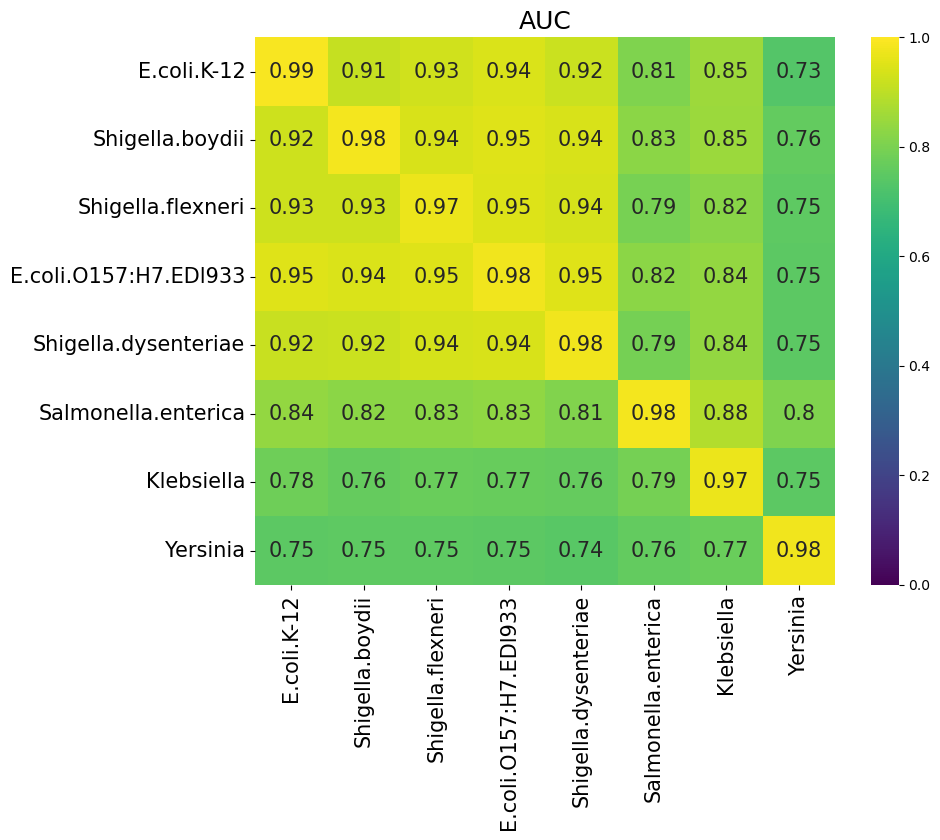

In [41]:
plt.figure(figsize=(10,8.5))

ax = sns.heatmap(matrix, annot=True, cmap='viridis', vmin=0, vmax=1, annot_kws={'size':15})
labels = list(index_map.keys())
'''
plt.xticks(np.arange(len(labels)) + 0.5, labels)
plt.yticks(np.arange(len(labels)) + 0.5, labels)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
'''
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.title('AUC', fontsize=18)
plt.tight_layout()
plt.savefig('AUC', dpi = 400)
plt.show()

In [43]:
auc_list = []
for k, v in auc_dic.items():
    auc_list.append(v)

auc_np = np.array(auc_list)
print(np.mean(auc_np))

0.8619250058635719


### two-gene cross-species prediction

In [12]:
def process_data (x):
 
    # protein =============================================================
    path = '/data1/xpgeng/cross_pathogen/get_sequence/'
    
    # calculate features 2-mer
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    all_2_mers = [a+b for a in amino_acids for b in amino_acids]

    pepdic = {}
    for r in SeqIO.parse(path + name_to_id[x][1] + '_protein.fasta', 'fasta'):     
        pepdic[r.id] = str(r.seq)
    print(len(pepdic))

    two_mer_feature_dic = {}
    for gene, sequ in pepdic.items():
        feature_vector = {two_mer: 0 for two_mer in all_2_mers}  
        for i in range(len(sequ) - 1):
            mer = sequ[i:i+2]
            if mer in feature_vector:
                feature_vector[mer] += 1   
        two_mer_feature_dic[gene] = [feature_vector[mer] for mer in all_2_mers]

    # Read knockout =============================================================
    
    path = '/data1/xpgeng/cross_pathogen/one_two_knockout/'
    
    two_gene = {}
    with open(path + name_to_id[x][1] +'_2KO_growth', 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader) 
        for row in reader:
            #print(len(row))
            if len(row) == 5:            
                two_gene[row[0], row[1]] = int(row[4])           
        print(len(two_gene)) 
    
    def count_value_in_dict(dictionary, value_to_count):
        count = 0
        for value in dictionary.values():
            if value == value_to_count:
                count += 1
        return count
    
    print(count_value_in_dict(two_gene, 1))

    # features processing

    feature_list = []
    label_list = []
    
    for key, value in tqdm(list(two_gene.items())):
        try:

            features = [a + b for a, b in zip(two_mer_feature_dic[key[0]],
                                            two_mer_feature_dic[key[1]])]

            feature_list.append(features)
            label_list.append(value)
        except:
            print(key)

    X_train = np.array(feature_list)
    y_train = np.array(label_list)

  
    with open(f"{x}_2ko_X.pkl" , 'wb') as file:
        pickle.dump(X_train, file)

    with open(f"{x}_2ko_y.pkl" , 'wb') as file:
        pickle.dump(y_train, file)
    print('saved')

    return

In [ ]:
for i in list(name_to_id.keys()):
    process_data(i)

In [14]:
auc_dic = {}

for train in species:
    with open(train + "_2ko_X.pkl" , 'rb') as f:
        X_train = pickle.load(f)
    with open(train + "_2ko_y.pkl" , 'rb') as f:
        y_train = pickle.load(f)
        
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)    
    
    # 运行模型
    num_train_epochs = 25
    model, train_losses, validation_losses = run_pytorch_MLP(
        X_train, X_val, y_train, y_val, batch_size=50, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)
    
    for test in species:
        with open(test + "_2ko_X.pkl" , 'rb') as f:
            X_test = pickle.load(f)
        
        with open(test + "_2ko_y.pkl" , 'rb') as f:
            y_test = pickle.load(f)
            
        X_test = scaler.transform(X_test) # scaler each test
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

        model.eval()  # 设置模型为评估模式
        
        with torch.no_grad():
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs, 1)
            predicted = predicted.cpu().numpy()
            y_test_np = y_test  # 直接使用 y_test，因为它已经是 numpy 数组
       
        
        # 计算混淆矩阵
        conf_matrix = confusion_matrix(y_test_np, predicted)
        print("Confusion Matrix:")
        print(conf_matrix)

        # 计算 Precision, Recall 和 F1-Score
        precision, recall, f1, _ = precision_recall_fscore_support(y_test_np, predicted, average='binary')
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")

        # 计算 AUC
        probabilities = torch.nn.functional.softmax(outputs, dim=1)[:, 1].cpu().numpy()
        auc_score = roc_auc_score(y_test_np, probabilities)
        print(f"AUC Score: {auc_score:.4f}")  
        
        auc_dic[train, test] = auc_score
        
        
        '''
        # Predict probabilities for the test data
        #s = time.time()
        probs = model.predict_proba(X_test)
        #e = time.time()
        #print('time is: ', round(e-s,3), 'second')
        
        # Change the threshold
        threshold = 0.5
        y_pred = np.where(probs[:,1] > threshold, 1, 0)
        
        # Calculate the ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        roc_auc = auc(fpr, tpr)
        
        # Calculate confusion matrix
        #y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        # Calculate precision, recall, and F1 score
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        print(cm)
        print(f'AUC: {roc_auc:.2f}')
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')  

        auc_dic[train, test] = roc_auc
        precision_dic[train, test] = precision
        recall_dic[train, test] = recall
        f1score_dic[train, test] = f1
        time_dic[train, test] = round(e-s,3)
        '''

Epoch 1 - Train Loss: 0.034, Validation Loss: 0.004
Epoch 2 - Train Loss: 0.006, Validation Loss: 0.003
Epoch 3 - Train Loss: 0.006, Validation Loss: 0.003
Epoch 4 - Train Loss: 0.005, Validation Loss: 0.003
Epoch 5 - Train Loss: 0.005, Validation Loss: 0.003
Epoch 6 - Train Loss: 0.005, Validation Loss: 0.003
Epoch 7 - Train Loss: 0.005, Validation Loss: 0.003
Epoch 8 - Train Loss: 0.005, Validation Loss: 0.003
Epoch 9 - Train Loss: 0.005, Validation Loss: 0.005
Epoch 10 - Train Loss: 0.004, Validation Loss: 0.003
Epoch 11 - Train Loss: 0.004, Validation Loss: 0.017
Epoch 12 - Train Loss: 0.004, Validation Loss: 0.003
Epoch 13 - Train Loss: 0.004, Validation Loss: 0.004
Epoch 14 - Train Loss: 0.004, Validation Loss: 0.003
Epoch 15 - Train Loss: 0.004, Validation Loss: 0.003
Epoch 16 - Train Loss: 0.004, Validation Loss: 0.003
Epoch 17 - Train Loss: 0.004, Validation Loss: 0.004
Epoch 18 - Train Loss: 0.004, Validation Loss: 0.003
Epoch 19 - Train Loss: 0.004, Validation Loss: 0.003
Ep

Precision: 0.7768
Recall: 0.9540
F1-Score: 0.8563
AUC Score: 0.9678
Confusion Matrix:
[[379762  14682]
 [ 14225 194478]]
Precision: 0.9298
Recall: 0.9318
F1-Score: 0.9308
AUC Score: 0.9668
Confusion Matrix:
[[436056  19341]
 [ 10699 203758]]
Precision: 0.9133
Recall: 0.9501
F1-Score: 0.9313
AUC Score: 0.9669
Confusion Matrix:
[[589679    306]
 [    72 247634]]
Precision: 0.9988
Recall: 0.9997
F1-Score: 0.9992
AUC Score: 1.0000
Confusion Matrix:
[[317250  13318]
 [  7015 178810]]
Precision: 0.9307
Recall: 0.9622
F1-Score: 0.9462
AUC Score: 0.9740
Confusion Matrix:
[[103686  27944]
 [ 12900  50046]]
Precision: 0.6417
Recall: 0.7951
F1-Score: 0.7102
AUC Score: 0.8442
Confusion Matrix:
[[420659 194750]
 [ 25003 112966]]
Precision: 0.3671
Recall: 0.8188
F1-Score: 0.5069
AUC Score: 0.8146
Confusion Matrix:
[[58428 31581]
 [13422 30184]]
Precision: 0.4887
Recall: 0.6922
F1-Score: 0.5729
AUC Score: 0.7263
Epoch 1 - Train Loss: 0.061, Validation Loss: 0.005
Epoch 2 - Train Loss: 0.006, Validati

Epoch 10 - Train Loss: 0.003, Validation Loss: 0.004
Epoch 11 - Train Loss: 0.004, Validation Loss: 0.009
Epoch 12 - Train Loss: 0.004, Validation Loss: 0.004
Epoch 13 - Train Loss: 0.004, Validation Loss: 0.005
Epoch 14 - Train Loss: 0.003, Validation Loss: 0.004
Epoch 15 - Train Loss: 0.003, Validation Loss: 0.003
Epoch 16 - Train Loss: 0.004, Validation Loss: 0.004
Epoch 17 - Train Loss: 0.003, Validation Loss: 0.004
Epoch 18 - Train Loss: 0.003, Validation Loss: 0.003
Epoch 19 - Train Loss: 0.004, Validation Loss: 0.004
Epoch 20 - Train Loss: 0.003, Validation Loss: 0.005
Epoch 21 - Train Loss: 0.002, Validation Loss: 0.003
Epoch 22 - Train Loss: 0.003, Validation Loss: 0.003
Epoch 23 - Train Loss: 0.004, Validation Loss: 0.003
Epoch 24 - Train Loss: 0.003, Validation Loss: 0.004
Epoch 25 - Train Loss: 0.003, Validation Loss: 0.005
Confusion Matrix:
[[508888 277658]
 [105590 154811]]
Precision: 0.3580
Recall: 0.5945
F1-Score: 0.4469
AUC Score: 0.6646
Confusion Matrix:
[[257222 1372

In [15]:
# plot result
import matplotlib.pyplot as plt
import seaborn as sns
matrix = np.zeros((8,8))
index_map = {}

a = 0
for i in species:
    index_map[i] = a
    a+=1

for (row, col),v in auc_dic.items():
    matrix[index_map[row], index_map[col]] = v
    

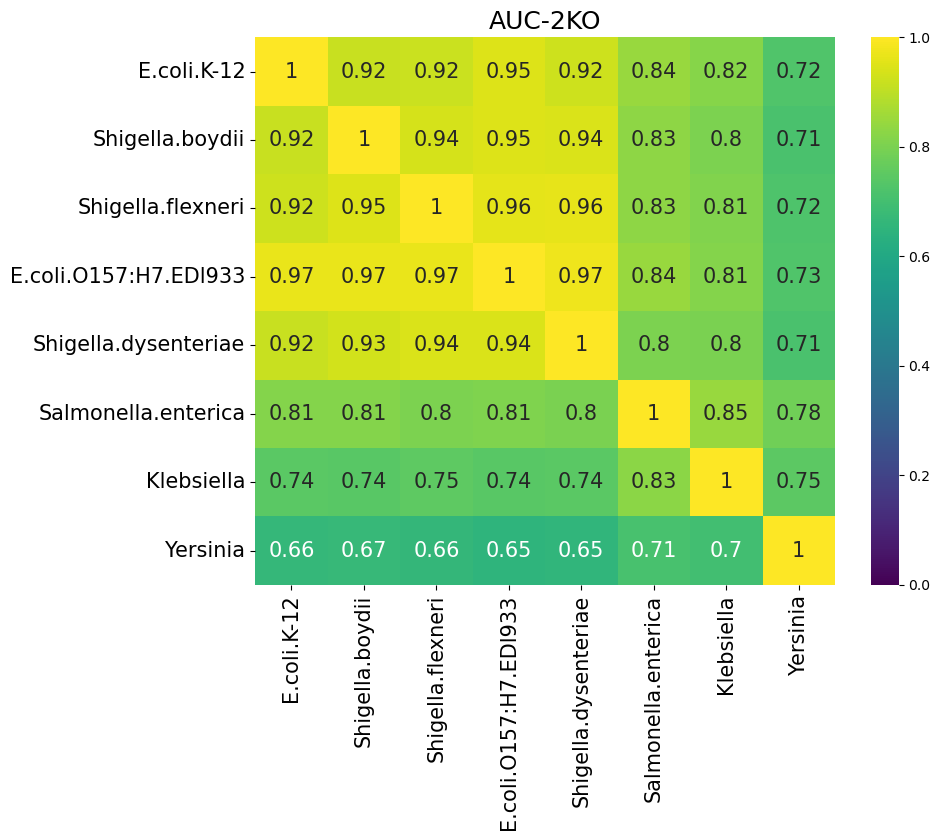

In [16]:
plt.figure(figsize=(10,8.5))

ax = sns.heatmap(matrix, annot=True, cmap='viridis', vmin=0, vmax=1, annot_kws={'size':15})
labels = list(index_map.keys())
'''
plt.xticks(np.arange(len(labels)) + 0.5, labels)
plt.yticks(np.arange(len(labels)) + 0.5, labels)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
'''
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.title('AUC-2KO', fontsize=18)
plt.tight_layout()
plt.savefig('AUC-2KO', dpi = 400)
plt.show()

In [17]:
auc_list = []
for k, v in auc_dic.items():
    auc_list.append(v)

auc_np = np.array(auc_list)
print(np.mean(auc_np))

0.8486716452742256
